In this notebook, I plot the distribution of snow depth for all the sites and validated against snow pits

In [ ]:
import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import rioxarray
import seaborn as sns

## Read CSV of 2020 and 2021 snow pits

In [2]:
# Read the 2020 data
pits_2020 = pd.read_csv("../../Snowex_Pits/2020/allpits_data_2020.csv",  usecols= ["date", "latitude", "longitude", "Snow Depth (cm)", "Site"])

#Read and prepare the 2021 data
pits_2021 = pd.read_csv("../../Snowex_Pits/2021/SNEX21_TS_SP_Summary_SWE_v01.csv", 
                usecols= ["Date/Local Standard Time", "Latitude (deg)", "Longitude (deg)", "Snow Depth (cm)", 
                "Location"]).rename(columns = {"Date/Local Standard Time": "Date", "Latitude (deg)": "latitude", "Longitude (deg)": "longitude", "Location": "Site"})

# Extract valid date values from Date column
for i in range(len(pits_2021["Date"])):
    pits_2021.loc[i, "date"] = pits_2021.loc[i, "Date"].split("T")[0]

pits_2021["date"] = pd.to_datetime(pits_2021["date"])

## USCOCR_20210319

In [ ]:
USCOCR = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USCOCR_20210319_20210319.tif")

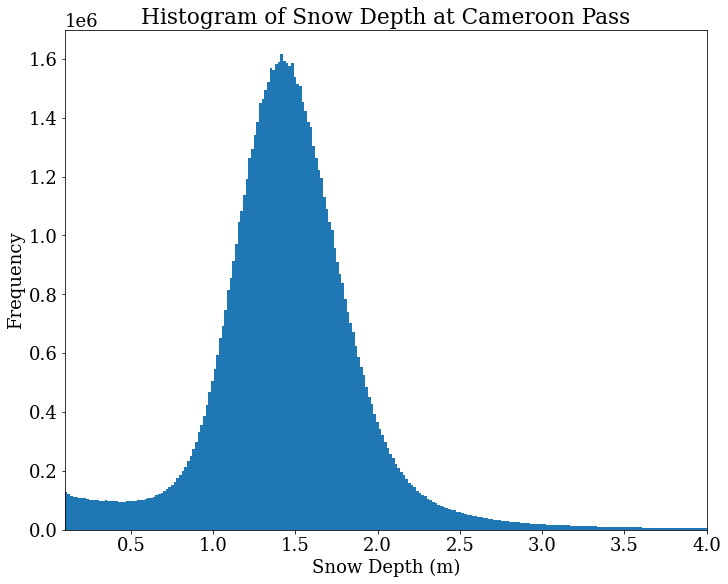

In [ ]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USCOCR.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Cameroon Pass')
#set the x-axis limits
plt.xlim(0.1, 4.0)
#plt.grid(True)
plt.show()

In [ ]:
#remove outlier and save pot
USCOCR = USCOCR.where(USCOCR.values > 0.1)
USCOCR.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USCOCP_20210319_20210319_v2.tif")

In [ ]:
pits_2021["Site"].value_counts(sort = False)

Boise River Basin              71
Cameron Pass                   30
Grand Mesa                      1
Senator Beck                   11
Central Ag Research Center      6
Fraser Experimental Forest    101
Little Cottonwood Canyon       23
Name: Site, dtype: int64

In [ ]:
pits_2021[(pits_2021["Site"] == "Cameron Pass") & (pits_2021["date"] == "2021-03-18")].to_csv("compressed/snow_depth/USCOCP_20210318.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [ ]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

## USCOFR_20200211_20200211

In [3]:
USCOFR_20200211 = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USCOFR_20200211_20200211.tif")

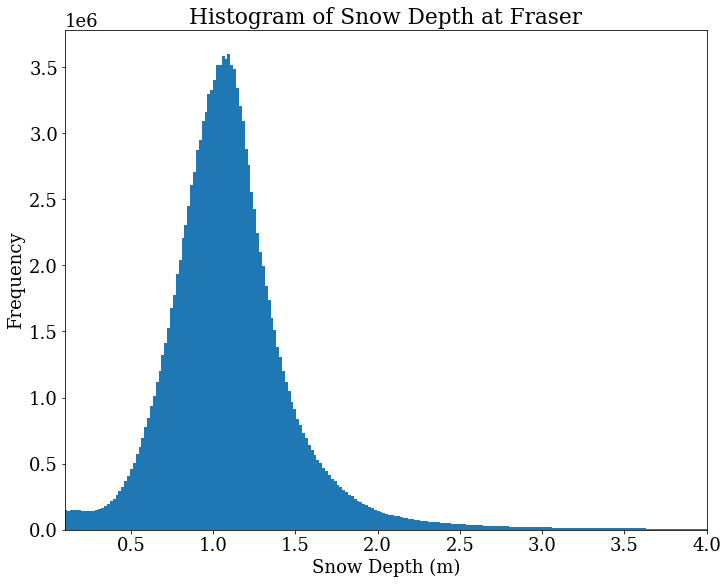

In [6]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USCOFR_20200211.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Fraser')
#set the x-axis limits
plt.xlim(0.1, 4.0)
#plt.grid(True)
plt.show()

In [7]:
#remove outlier and save pot
USCOFR_20200211 = USCOFR_20200211.where(USCOFR_20200211.values > 0.1)
USCOFR_20200211.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USCOFR_20200211_20200211_v2.tif")

In [9]:
pits_2020["Site"].value_counts(sort = False)

American River Basin            7
Boise River Basin              47
Cameron Pass                   16
East River                    108
Fraser Experimental Forest     51
Grand Mesa                    228
Jemez River                    15
Little Cottonwood Canyon       14
Mammoth Lakes                  15
Niwot Ridge                    67
Senator Beck                   13
Name: Site, dtype: int64

In [14]:
pits_2020[(pits_2020["Site"] == "Fraser Experimental Forest") & ((pits_2020["date"] == "2020-02-10") | (pits_2020["date"] == "2020-02-12"))].to_csv("compressed/snow_depth/USCOFR_20200210_20200212.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [ ]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

## USCOFR_20210319_20210320

In [15]:
USCOFR_20210319_20210320 = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USCOFR_20210319_20210320.tif")

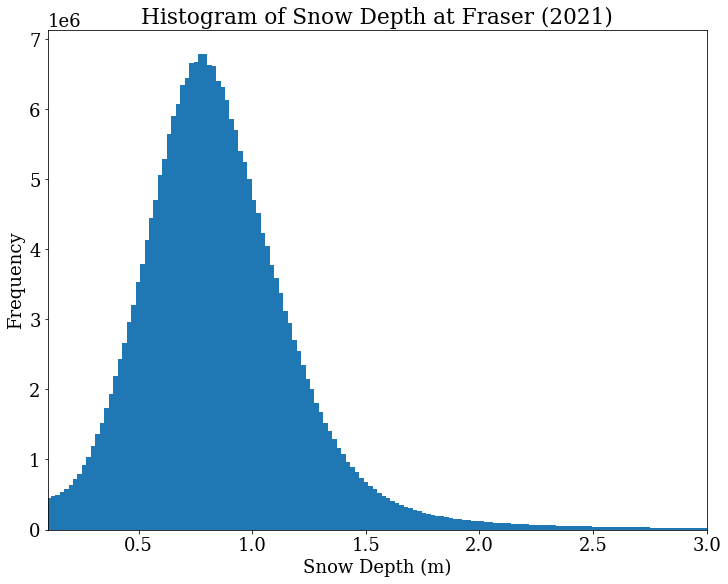

In [19]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USCOFR_20210319_20210320.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Fraser (2021)')
#set the x-axis limits
plt.xlim(0.1, 3)
#plt.grid(True)
plt.show()

In [20]:
#remove outlier and save pot
USCOFR_20210319_20210320 = USCOFR_20210319_20210320.where(USCOFR_20210319_20210320.values > 0.1)
USCOFR_20210319_20210320.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USCOFR_20210319_20210320_v2.tif")

In [ ]:
pits_2021["Site"].value_counts(sort = False)

Boise River Basin              71
Cameron Pass                   30
Grand Mesa                      1
Senator Beck                   11
Central Ag Research Center      6
Fraser Experimental Forest    101
Little Cottonwood Canyon       23
Name: Site, dtype: int64

In [31]:
pits_2021[(pits_2021["Site"] == "Fraser Experimental Forest") & (pits_2021["date"] == "2021-03-22")].to_csv("compressed/snow_depth/USCOFR_20210322.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [ ]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

## USIDBN_20200218_20200219

In [3]:
USIDBN_20200218_20200219 = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USIDBN_20200218_20200219.tif")

In [4]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USIDBN_20200218_20200219.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Banner-2020-02-18')
#set the x-axis limits
#plt.xlim(0.1, 4.0)
#plt.grid(True)
plt.show()

: 

: 

In [ ]:
#remove outlier and save pot
USIDBN_20200218_20200219 = USIDBN_20200218_20200219.where(USIDBN_20200218_20200219.values > 0.1)
USIDBN_20200218_20200219.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USIDBN_20200218_20200219_v2.tif")

In [ ]:
pits_2021["Site"].value_counts(sort = False)

Boise River Basin              71
Cameron Pass                   30
Grand Mesa                      1
Senator Beck                   11
Central Ag Research Center      6
Fraser Experimental Forest    101
Little Cottonwood Canyon       23
Name: Site, dtype: int64

In [ ]:
pits_2021[(pits_2021["Site"] == "Cameron Pass") & (pits_2021["date"] == "2021-03-18")].to_csv("compressed/snow_depth/USCOCP_20210318.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [ ]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

In [ ]:
USCOCR = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USCOCR_20210319_20210319.tif")

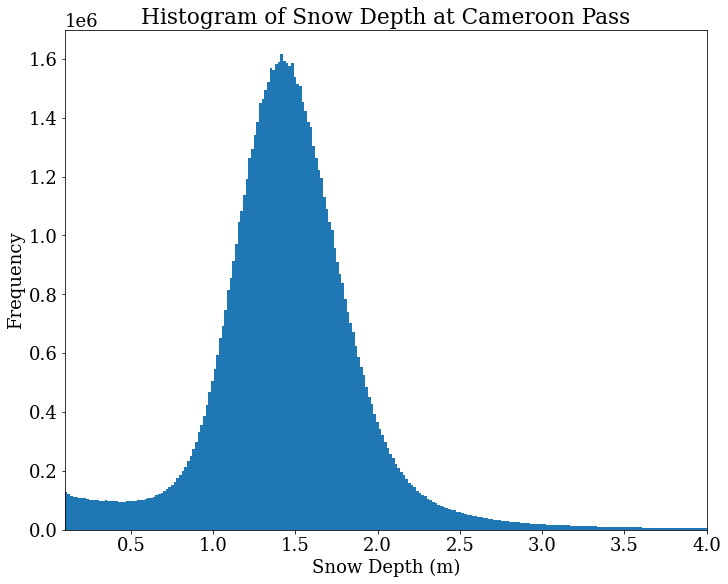

In [ ]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USCOCR.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Cameroon Pass')
#set the x-axis limits
plt.xlim(0.1, 4.0)
#plt.grid(True)
plt.show()

In [ ]:
#remove outlier and save pot
USCOCR = USCOCR.where(USCOCR.values > 0.1)
USCOCR.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USCOCP_20210319_20210319_v2.tif")

In [ ]:
pits_2021["Site"].value_counts(sort = False)

Boise River Basin              71
Cameron Pass                   30
Grand Mesa                      1
Senator Beck                   11
Central Ag Research Center      6
Fraser Experimental Forest    101
Little Cottonwood Canyon       23
Name: Site, dtype: int64

In [ ]:
pits_2021[(pits_2021["Site"] == "Cameron Pass") & (pits_2021["date"] == "2021-03-18")].to_csv("compressed/snow_depth/USCOCP_20210318.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [ ]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

In [3]:
USCOCR = rioxarray.open_rasterio("compressed/snow_depth/QSI_0.5M_PCSD_USCOCR_20210319_20210319.tif")

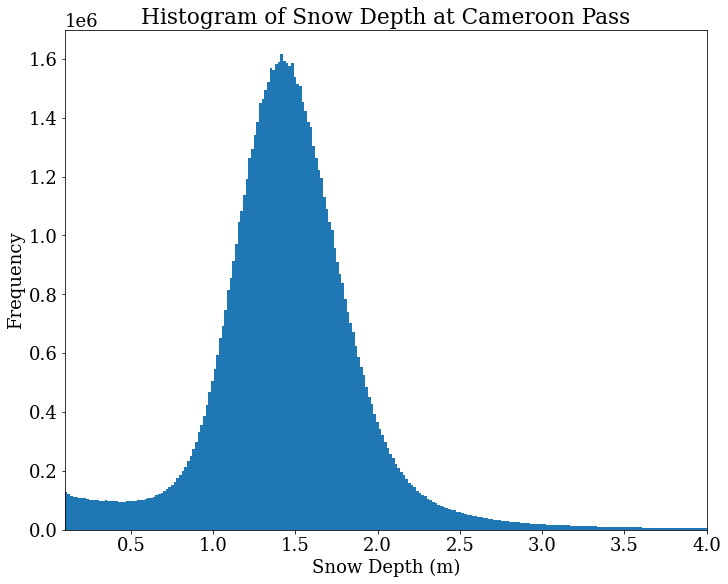

In [110]:
# Set font size and font family of matplotlib for plotting
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create a figure and axes elements
fig, ax = plt.subplots(figsize=(10,8), constrained_layout=True)

#plot the histogram of the raster data
plt.hist(USCOCR.values.flatten(), bins = 1000)
plt.xlabel('Snow Depth (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Snow Depth at Cameroon Pass')
#set the x-axis limits
plt.xlim(0.1, 4.0)
#plt.grid(True)
plt.show()

In [4]:
#remove outlier and save pot
USCOCR = USCOCR.where(USCOCR.values > 0.1)
USCOCR.rio.to_raster("compressed/snow_depth/QSI_0.5M_PCSD_USCOCP_20210319_20210319_v2.tif")

In [115]:
pits_2021["Site"].value_counts(sort = False)

Boise River Basin              71
Cameron Pass                   30
Grand Mesa                      1
Senator Beck                   11
Central Ag Research Center      6
Fraser Experimental Forest    101
Little Cottonwood Canyon       23
Name: Site, dtype: int64

In [113]:
pits_2021[(pits_2021["Site"] == "Cameron Pass") & (pits_2021["date"] == "2021-03-18")].to_csv("compressed/snow_depth/USCOCP_20210318.csv")

Check: https://snowex.hackweek.io/tutorials/uavsar/3_interferometric_swe_inversion.html#now-we-have-a-new-snow-permittivity-either-from-density-or-directly-measured-and-we-can-use-that-along-with-our-unwrapped-phase-to-calculate-the-uavsar-snow-depth-change

![](https://snowex.hackweek.io/_images/3_interferometric_swe_inversion_20_0.png)

In [5]:
# Now we can plot the results!
f, ax = plt.subplots(figsize = (12,8))
USCOCR.plot(ax = ax, cmap = 'Blues') 

: 

: 

## USCOFR_20200211_20200211

## USCOFR_20210319_20210320

## USIDBN_20200218_20200219

## USIDBN_20210315_20210315

## USIDDC_20200219_20200219

## USIDMC_20200209_20200209

## USIDMC_20210315_20210315

## USUTLC_20210318_20210318